In [1]:
#q21
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [2]:
#q22
from sklearn.datasets import make_regression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 437.3544619132517


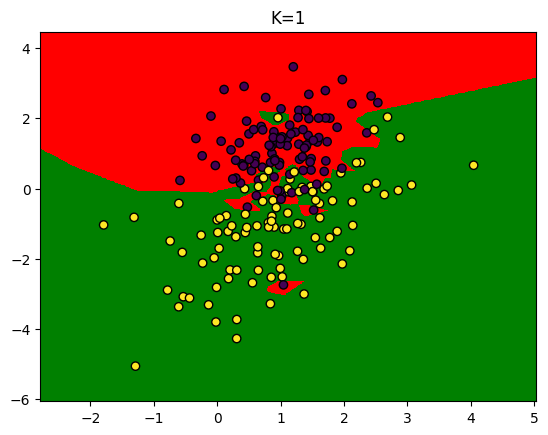

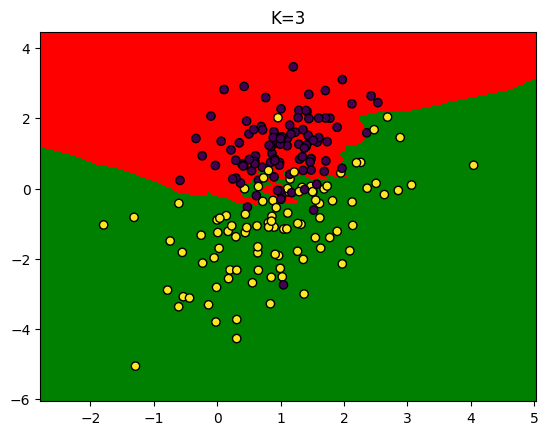

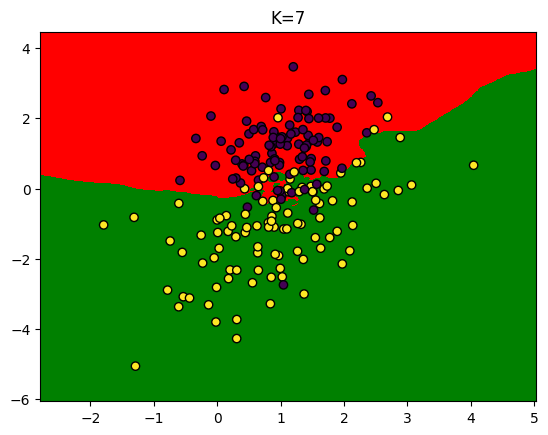

In [7]:
#q24
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, n_samples=200, random_state=1)

def plot_decision_boundary(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)

    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(f"K={k}")
    plt.show()

for k in [1, 3, 7]:
    plot_decision_boundary(k)


In [9]:
#q26
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, n_features=5, random_state=42)

pca = PCA(n_components=5)
pca.fit(X)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.81919278 0.15822046 0.0082329  0.00753226 0.00682161]


In [11]:
#q28
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(1, 11), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)



NameError: name 'X_train_scaled' is not defined

In [12]:
#q29
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

misclassified = (y_test != y_pred).sum()
print("Number of misclassified samples:", misclassified)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [13]:
#q30
import matplotlib.pyplot as plt

pca = PCA().fit(X_train_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()


NameError: name 'X_train_scaled' is not defined